In [ ]:
import warnings
import numpy as np
import pandas as pd
import sklearn
import sklearn.mixture
import scipy
import seaborn as sns
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

from metadimm import MetaDIMM
from dataloader import load_zheng_data, load_kong_data, load_simulation_data, sample_data
from pyDIMM import DirichletMultinomialMixture
from utils import Utils

warnings.filterwarnings('ignore')

# # To generate new simulation cell tree data.
# !python3 simulator.py

In [ ]:
def run(adata):
    print(adata.shape)
    cell_type_k = len(adata.obs['cell_type'].unique())

    md = MetaDIMM()
    adata = md.filter(adata)
    adata_raw = adata.copy()
    adata = md.preprocess(adata, normalize=True, log1p=True, hvg=True, scale=True)
    adata = md.pca(adata)
    metagenes = md.get_metagenes(adata, n_meta_pcs=None, loading_threshold=0.03)
    adata_meta = md.merge(adata_raw, metagenes)
    cluster_label, posterior_prob = md.dimm_cluster(adata_meta, n_components=cell_type_k, verbose=True)
    adata.obs['MetaDIMM_prediction'] = cluster_label
    adata.obs['Posterior_prob'] = pd.Categorical(np.where(posterior_prob > 0.95, 'Not Vague', 'Vague'))
    sc.pl.umap(adata, color='cell_type')
    sc.pl.umap(adata, color='MetaDIMM_prediction')
    sc.pl.umap(adata, color='Posterior_prob', palette={'Not Vague': 'lightgrey', 'Vague': 'red'})
    RI, ARI = md.score(adata, 'MetaDIMM_prediction')

    md.plot_pc(adata, 0, 1)
    md.plot_pc(adata, 2, 3)
    md.plot_pc(adata, 4, 5)

In [ ]:
def run_dimm(adata, n_top_genes):
    genes_std = adata.X.std(axis=0)
    top_genes = genes_std.argsort()[::-1]
    adata = adata[:, top_genes[:n_top_genes]]
    md = MetaDIMM()
    md.pca(adata)
    dimm = DirichletMultinomialMixture(n_components=3, max_iter=300, verbose=2).fit(adata.X)
    adata.obs['prediction'] = pd.Categorical(dimm.predict(adata.X))
    sc.pl.umap(adata, color='cell_type')
    sc.pl.umap(adata, color='prediction')
    md.score(adata, 'prediction')

In [ ]:
adata_raw = load_zheng_data(['CD56+NK', 'CD19+B', 'CD4+CD25+T'])
adata = sample_data(adata_raw, [('CD56+NK', 1000), ('CD19+B', 2000), ('CD4+CD25+T', 3000)])

# Results

-----------------------------------
Function 'filter' executed in 0.89s
-----------------------------------
---------------------------------------
Function 'preprocess' executed in 0.40s
---------------------------------------
---------------------------------
Function 'pca' executed in 17.10s
---------------------------------
----------------------------------------------
Function 'select_n_meta_pcs' executed in 0.53s
----------------------------------------------
------------------------------------------
Function 'get_metagenes' executed in 0.53s
------------------------------------------
----------------------------------
Function 'merge' executed in 0.06s
----------------------------------
Fitting data shape: (8000, 12)
Initialization 0
  Iteration 10	 time lapse 0.17798s	 ll change 0.00520
  Iteration 20	 time lapse 0.08914s	 ll change 0.00480
  Iteration 30	 time lapse 0.09244s	 ll change 0.00442
  Iteration 40	 time lapse 0.09437s	 ll change 0.00407
  Iteration 50	 time lapse 

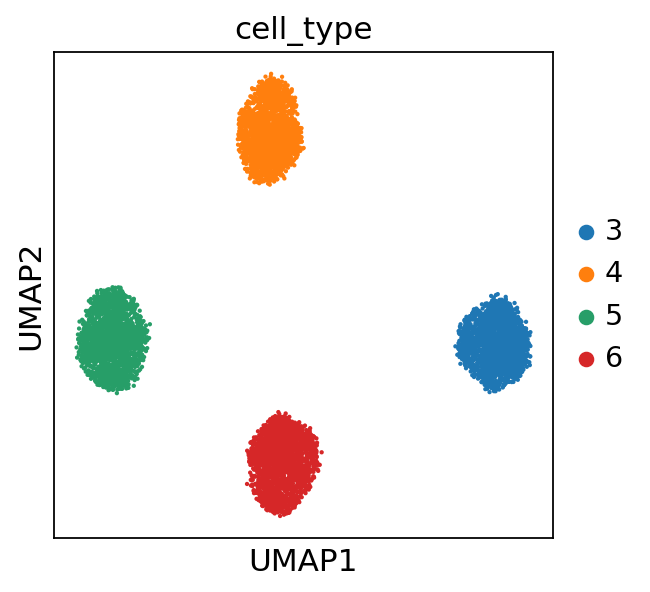

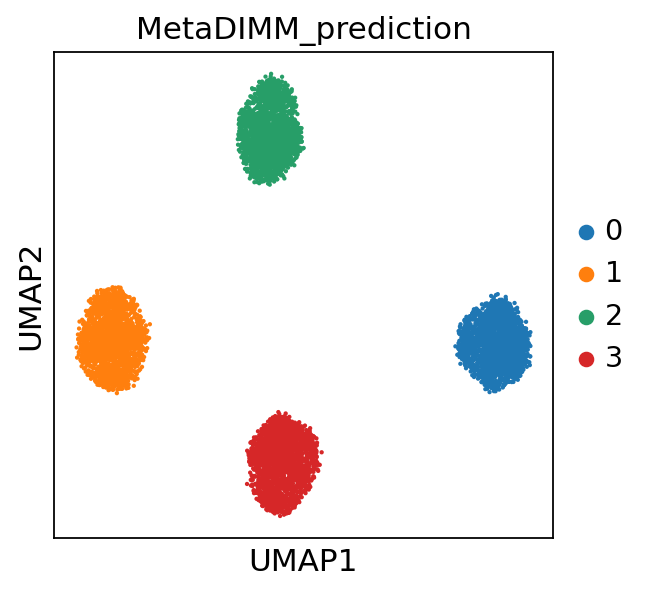

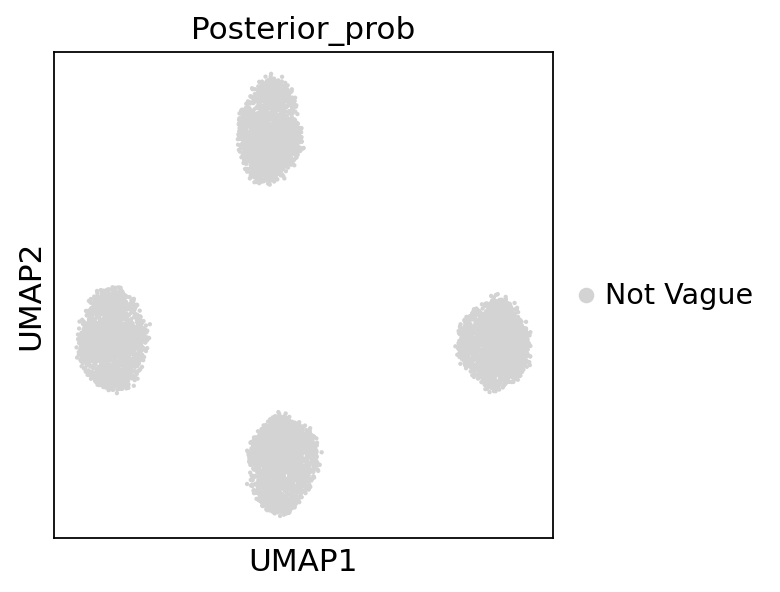

Rand Index = 1.0
Adjusted Rand Index = 1.0


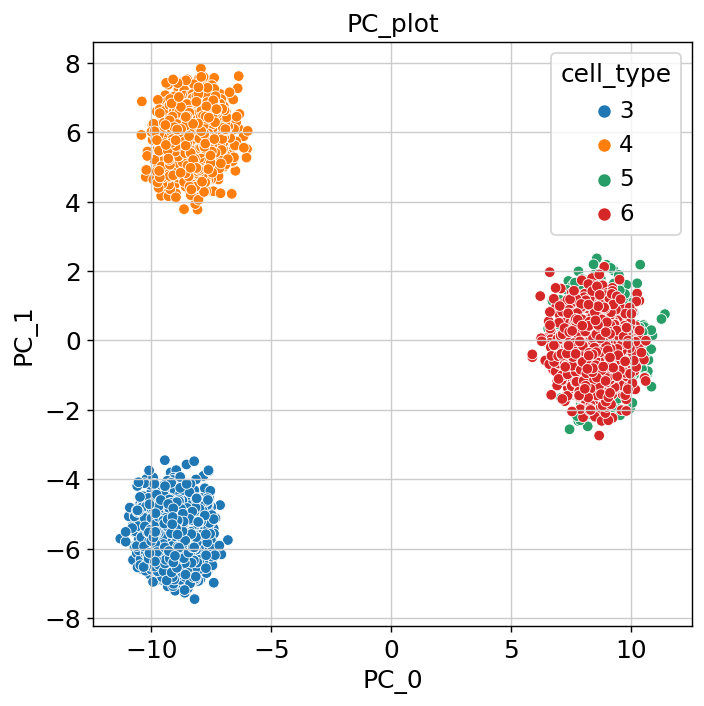

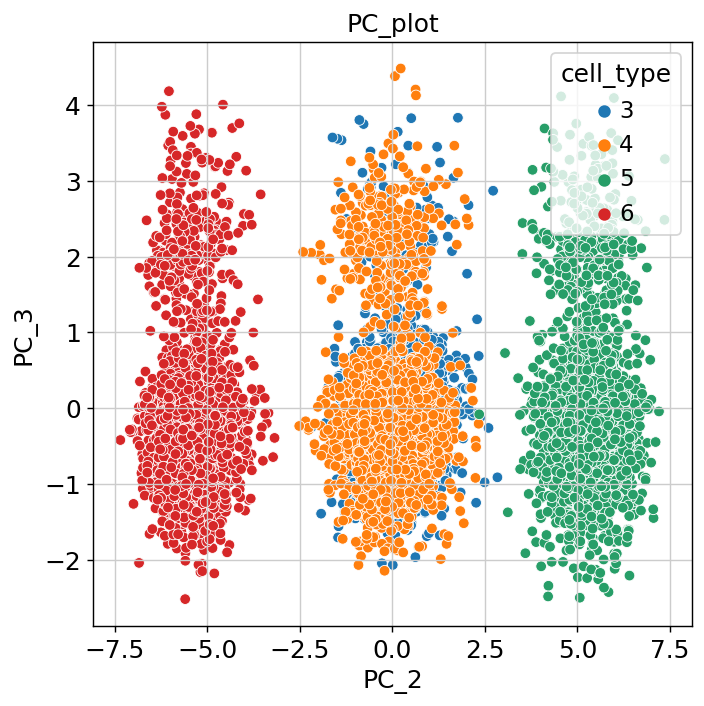

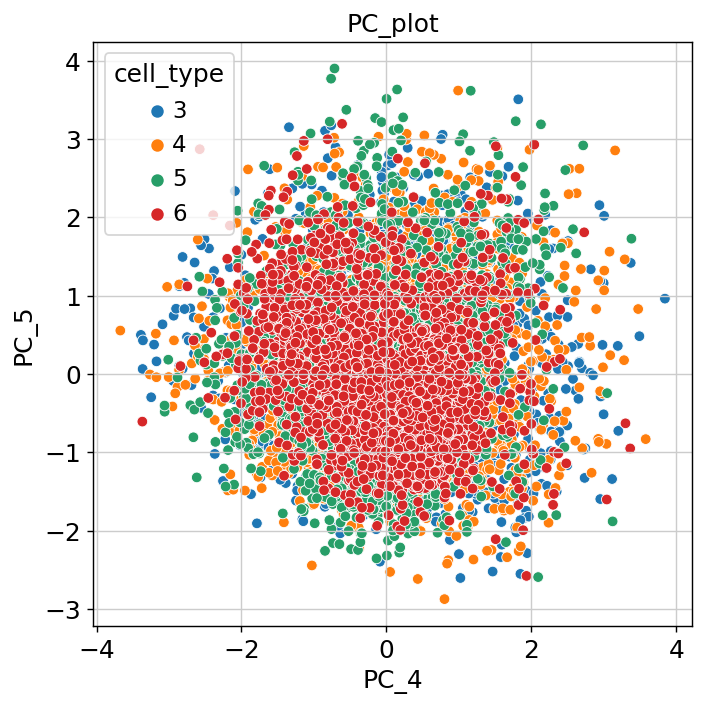

In [3]:
adata = load_simulation_data('20230321113059')
run(adata)

-----------------------------------
Function 'filter' executed in 0.34s
-----------------------------------
---------------------------------------
Function 'preprocess' executed in 0.39s
---------------------------------------
---------------------------------
Function 'pca' executed in 11.78s
---------------------------------
----------------------------------------------
Function 'select_n_meta_pcs' executed in 0.36s
----------------------------------------------
------------------------------------------
Function 'get_metagenes' executed in 0.36s
------------------------------------------
----------------------------------
Function 'merge' executed in 0.08s
----------------------------------
Fitting data shape: (8000, 10)
Initialization 0
  Iteration 10	 time lapse 0.22399s	 ll change 0.00434
  Iteration 20	 time lapse 0.12900s	 ll change 0.00341
  Iteration 30	 time lapse 0.12665s	 ll change 0.00291
  Iteration 40	 time lapse 0.11742s	 ll change 0.00264
  Iteration 50	 time lapse 

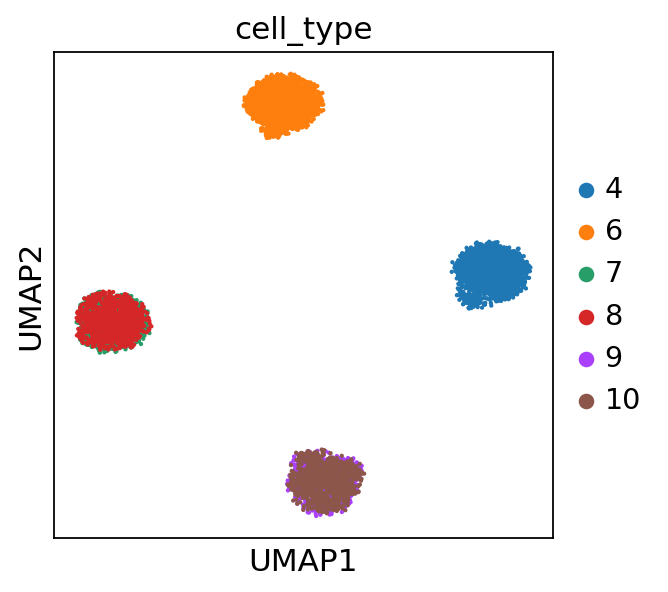

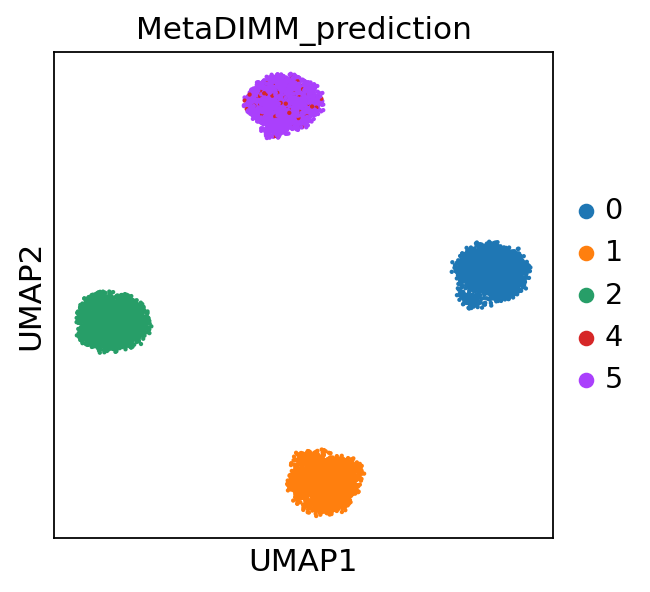

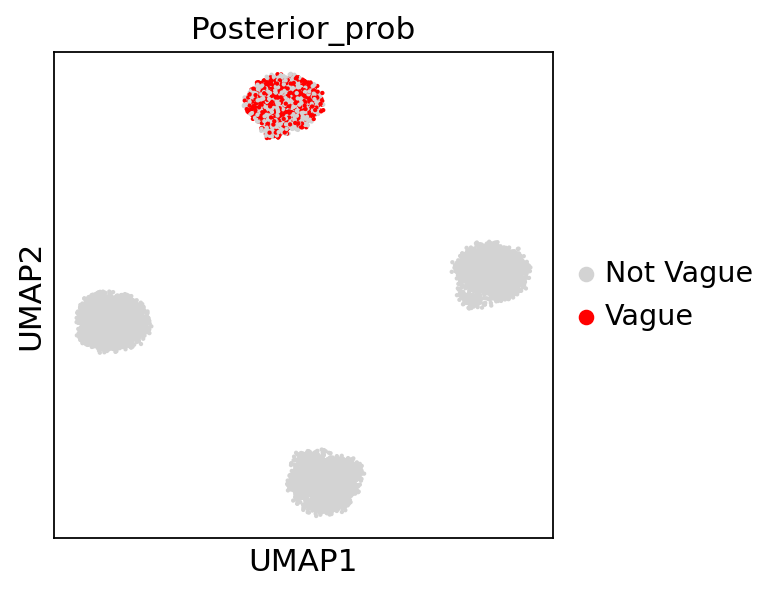

Rand Index = 0.9305514439304913
Adjusted Rand Index = 0.7953188719761074


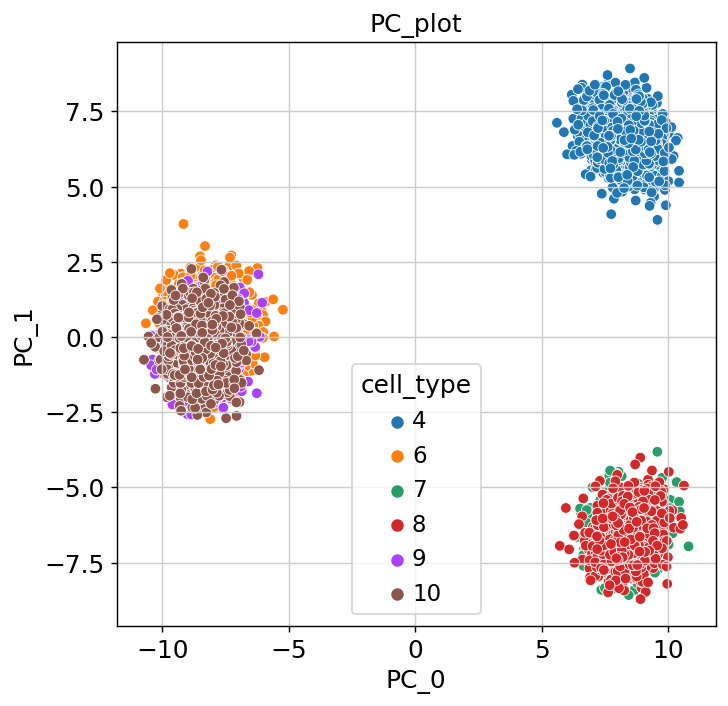

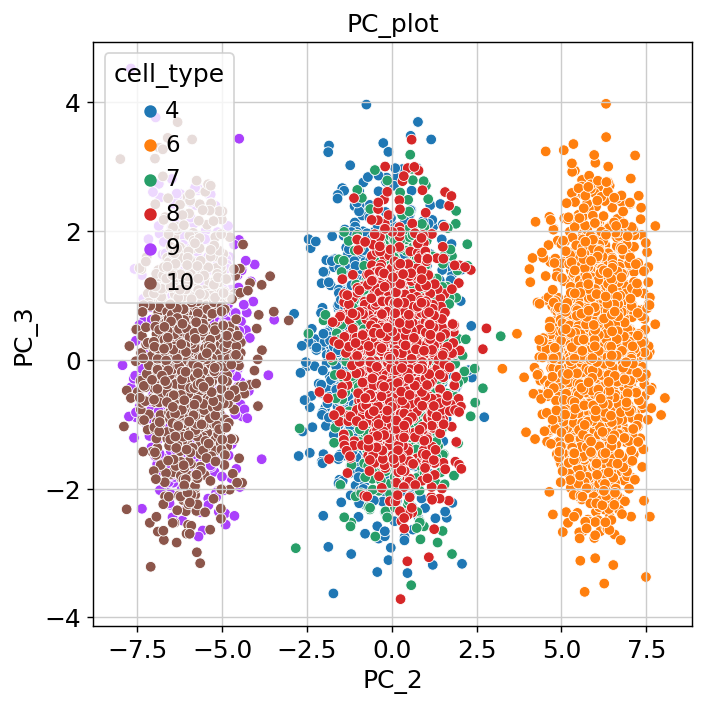

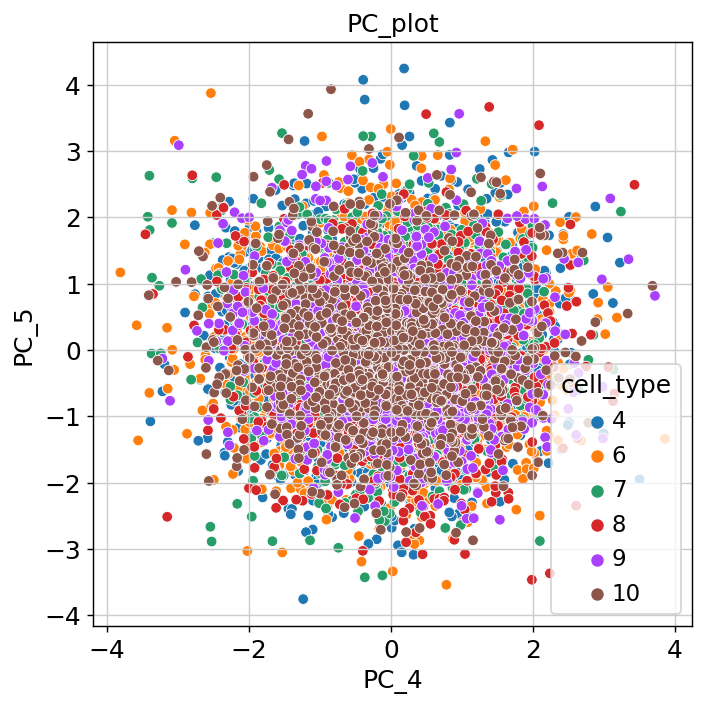

In [4]:
adata = load_simulation_data('20230321114007')
run(adata)

------------------------------------
Function 'filter' executed in 49.13s
------------------------------------
----------------------------------------
Function 'preprocess' executed in 26.16s
----------------------------------------
---------------------------------
Function 'pca' executed in 53.20s
---------------------------------
----------------------------------------------
Function 'select_n_meta_pcs' executed in 2.39s
----------------------------------------------
------------------------------------------
Function 'get_metagenes' executed in 2.43s
------------------------------------------
----------------------------------
Function 'merge' executed in 1.06s
----------------------------------
Fitting data shape: (32657, 18)
Initialization 0
  Iteration 10	 time lapse 0.61943s	 ll change 0.05500
  Iteration 20	 time lapse 0.44727s	 ll change 0.05250
  Iteration 30	 time lapse 0.44116s	 ll change 0.01788
  Iteration 40	 time lapse 0.43912s	 ll change 0.01439
  Iteration 50	 time

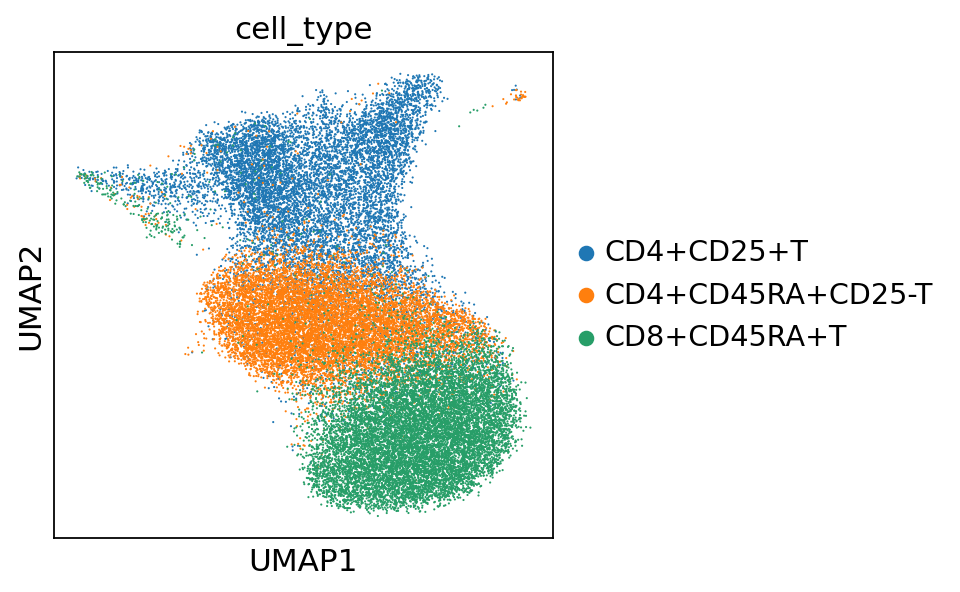

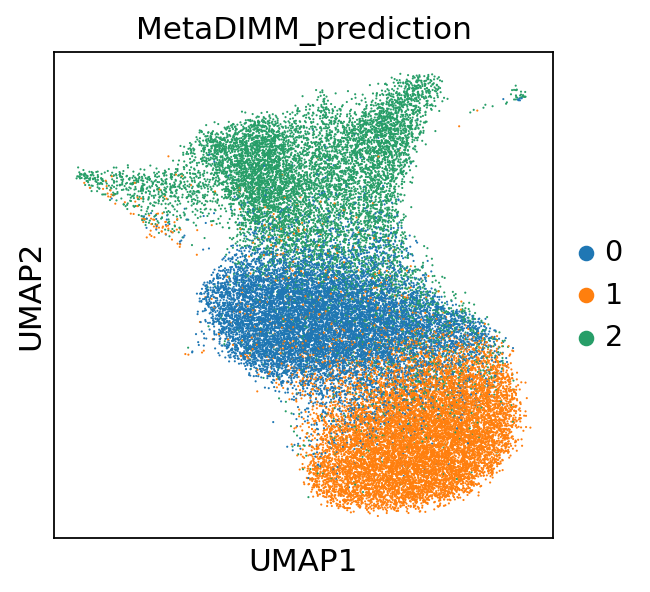

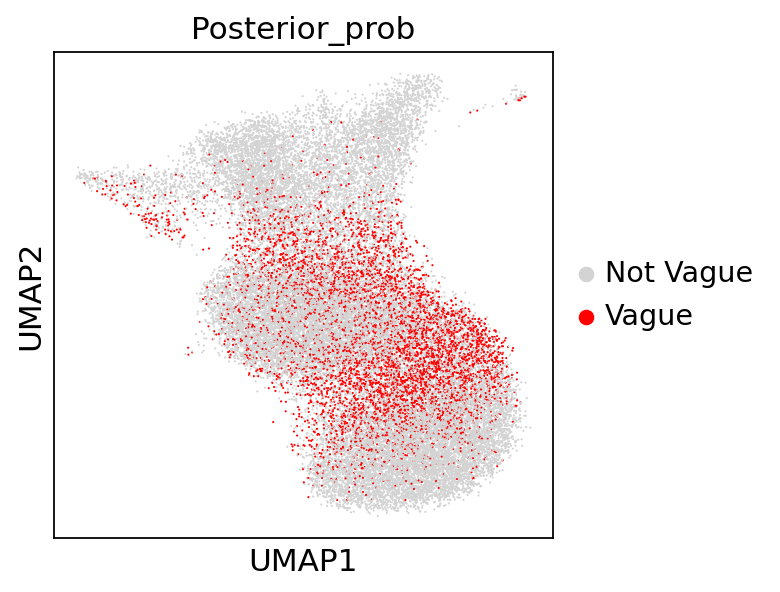

Rand Index = 0.8250226130320408
Adjusted Rand Index = 0.6075032362840882


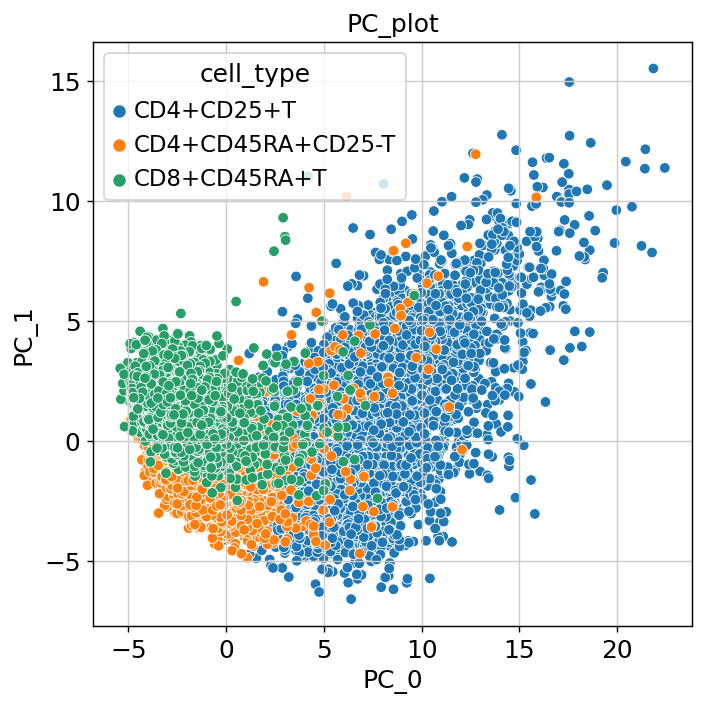

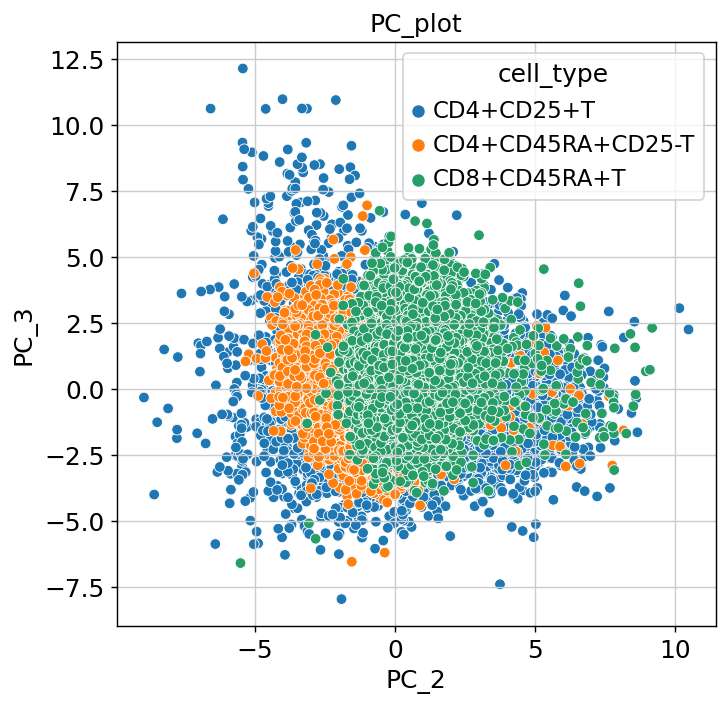

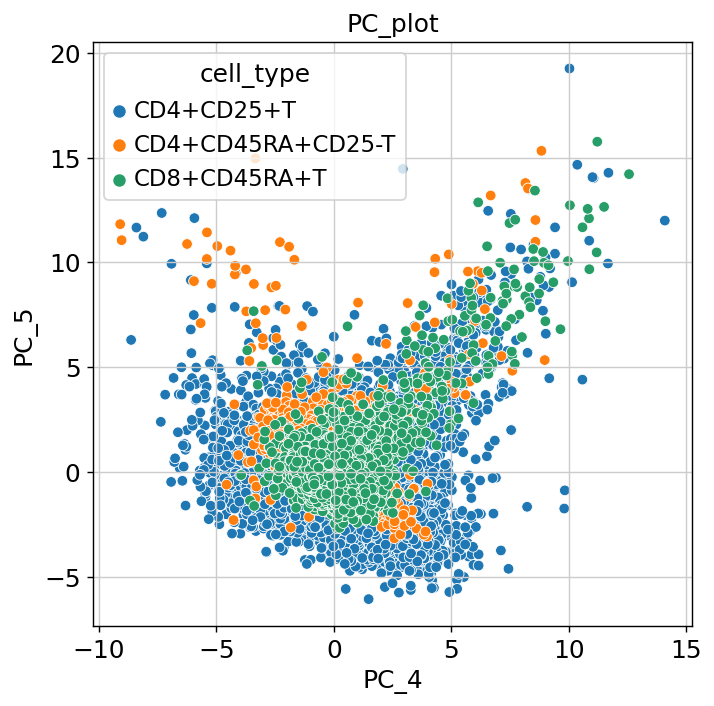

In [5]:
adata = load_zheng_data(['CD4+CD25+T', 'CD4+CD45RA+CD25-T', 'CD8+CD45RA+T'])
run(adata)

------------------------------------
Function 'filter' executed in 57.33s
------------------------------------
----------------------------------------
Function 'preprocess' executed in 29.31s
----------------------------------------
---------------------------------
Function 'pca' executed in 41.53s
---------------------------------
----------------------------------------------
Function 'select_n_meta_pcs' executed in 0.90s
----------------------------------------------
------------------------------------------
Function 'get_metagenes' executed in 0.94s
------------------------------------------
----------------------------------
Function 'merge' executed in 0.62s
----------------------------------
Fitting data shape: (28676, 10)
Initialization 0
  Iteration 10	 time lapse 0.43072s	 ll change 0.02736
  Iteration 20	 time lapse 0.25349s	 ll change 0.01903
  Iteration 30	 time lapse 0.25666s	 ll change 0.01336
  Iteration 40	 time lapse 0.25805s	 ll change 0.00947
  Iteration 50	 time

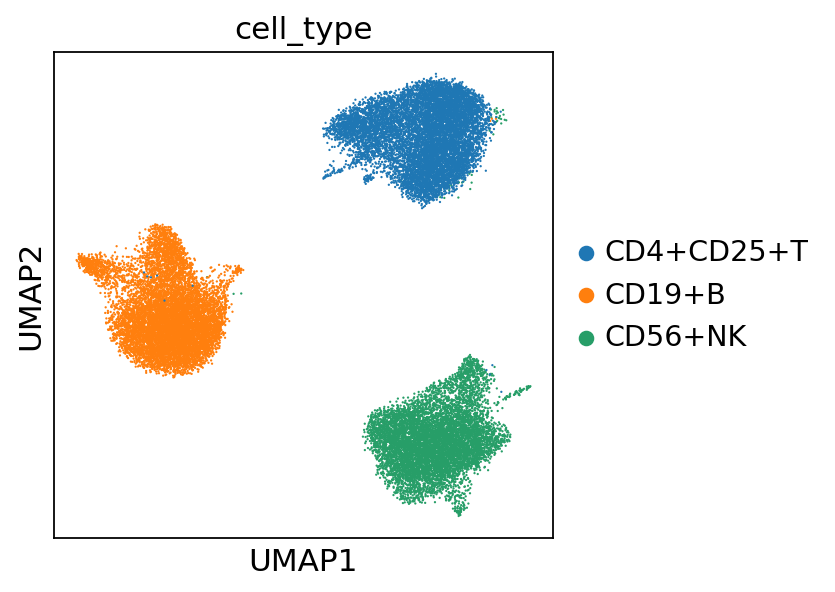

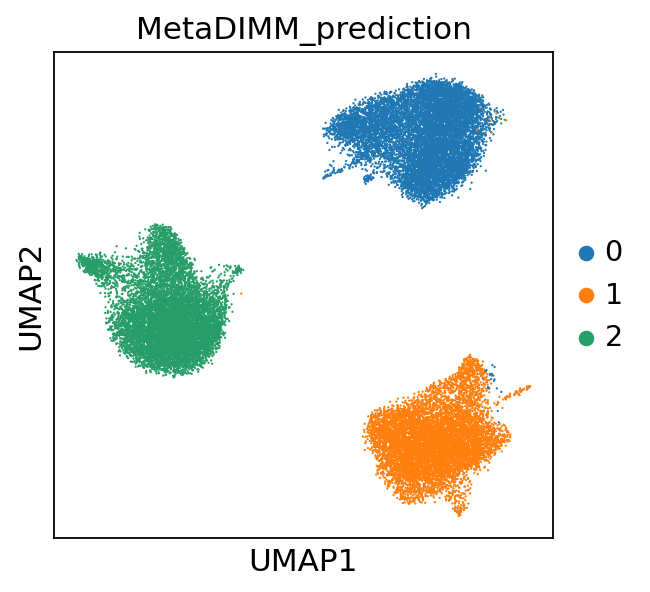

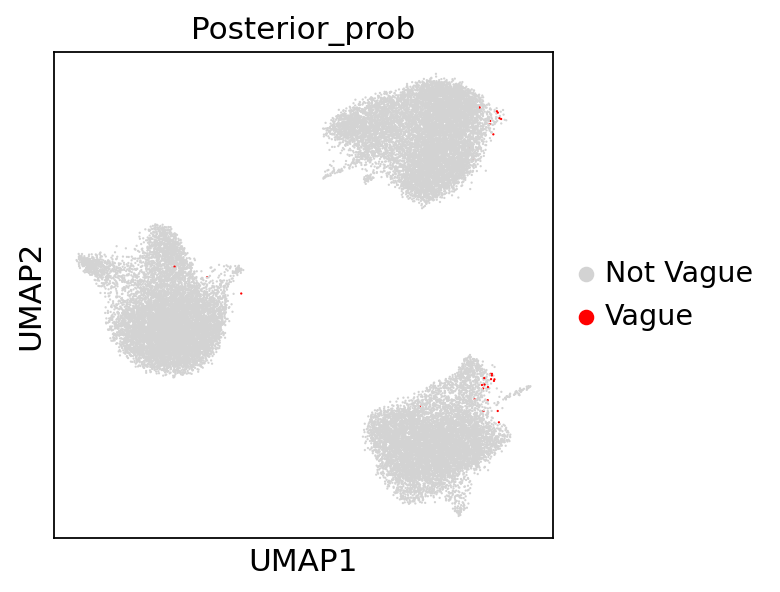

Rand Index = 0.9960420063960846
Adjusted Rand Index = 0.9911312810122322


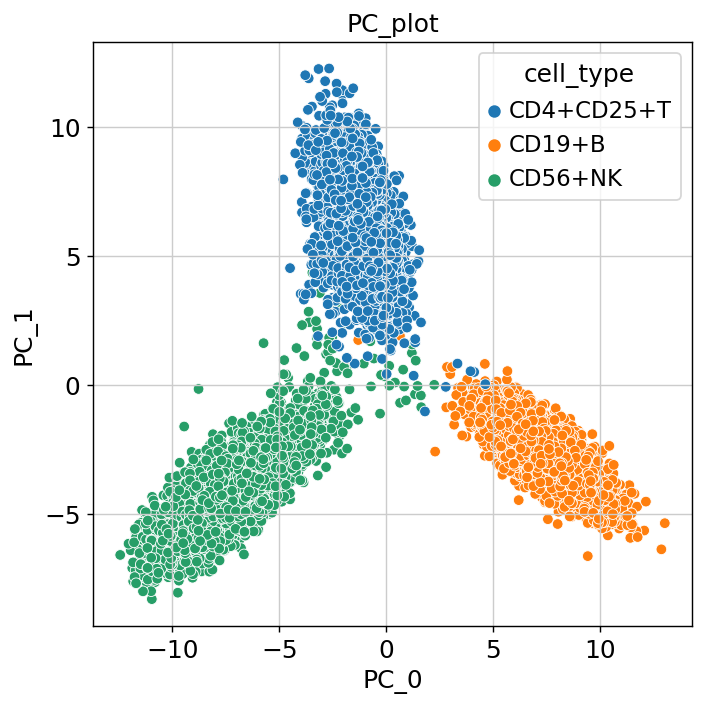

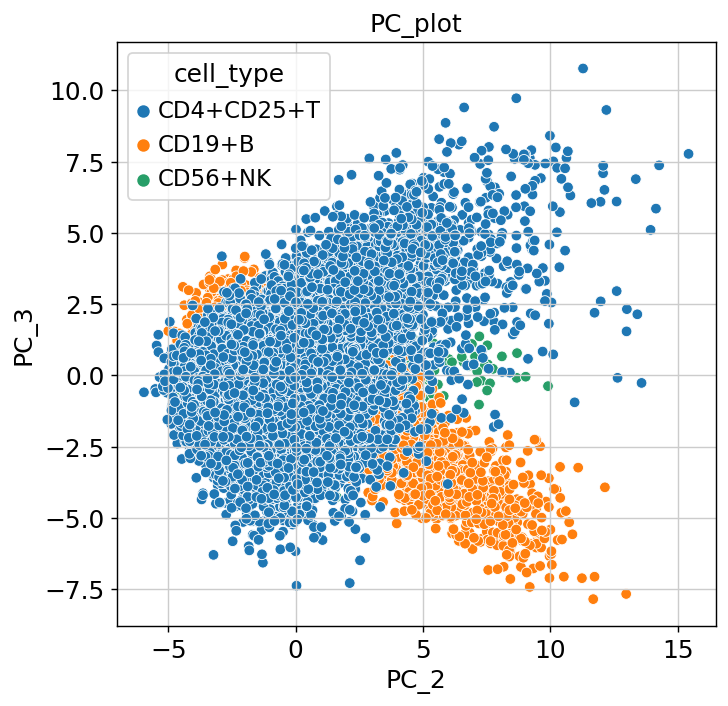

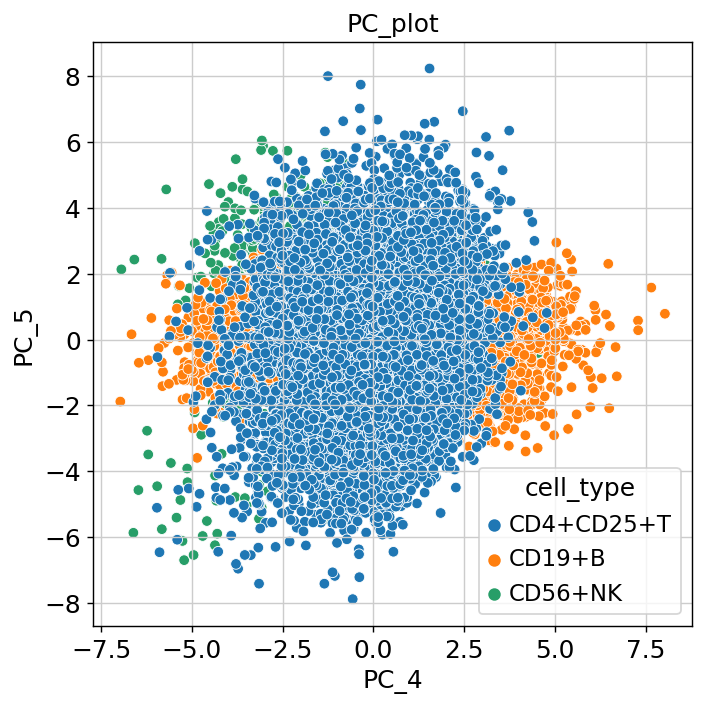

In [6]:
adata = load_zheng_data(['CD56+NK', 'CD19+B', 'CD4+CD25+T'])
run(adata)

-----------------------------------
Function 'filter' executed in 3.55s
-----------------------------------
---------------------------------------
Function 'preprocess' executed in 2.37s
---------------------------------------
---------------------------------
Function 'pca' executed in 22.26s
---------------------------------
----------------------------------------------
Function 'select_n_meta_pcs' executed in 2.44s
----------------------------------------------
------------------------------------------
Function 'get_metagenes' executed in 2.47s
------------------------------------------
----------------------------------
Function 'merge' executed in 0.54s
----------------------------------
Fitting data shape: (8511, 34)
Initialization 0
  Iteration 10	 time lapse 0.34194s	 ll change 0.09069
  Iteration 20	 time lapse 0.22492s	 ll change 0.04536
  Iteration 30	 time lapse 0.22134s	 ll change 0.02663
  Iteration 40	 time lapse 0.21712s	 ll change 0.01695
  Iteration 50	 time lapse 

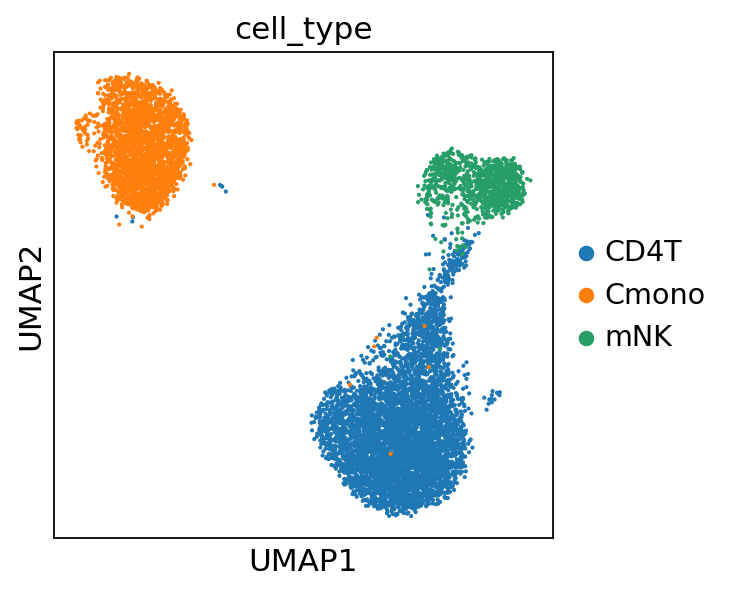

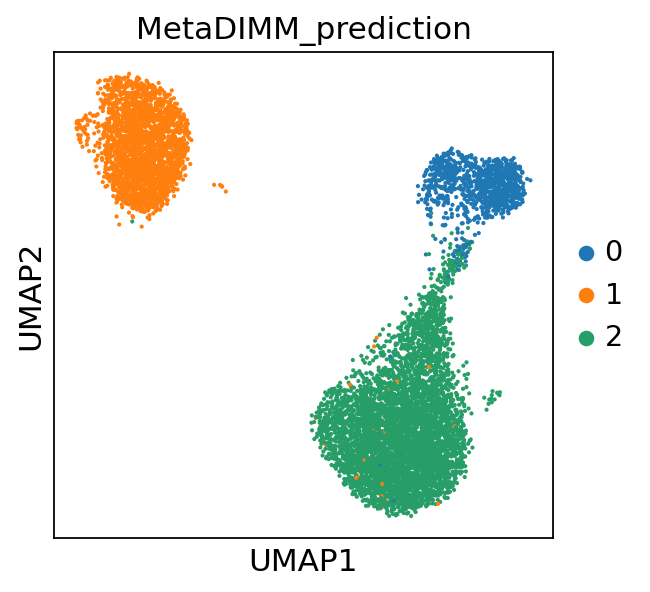

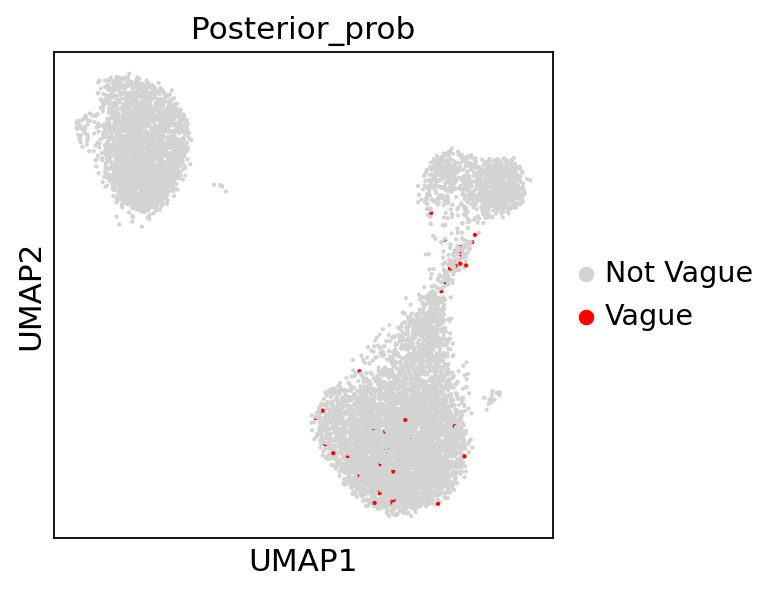

Rand Index = 0.9855755066954895
Adjusted Rand Index = 0.9710076439621398


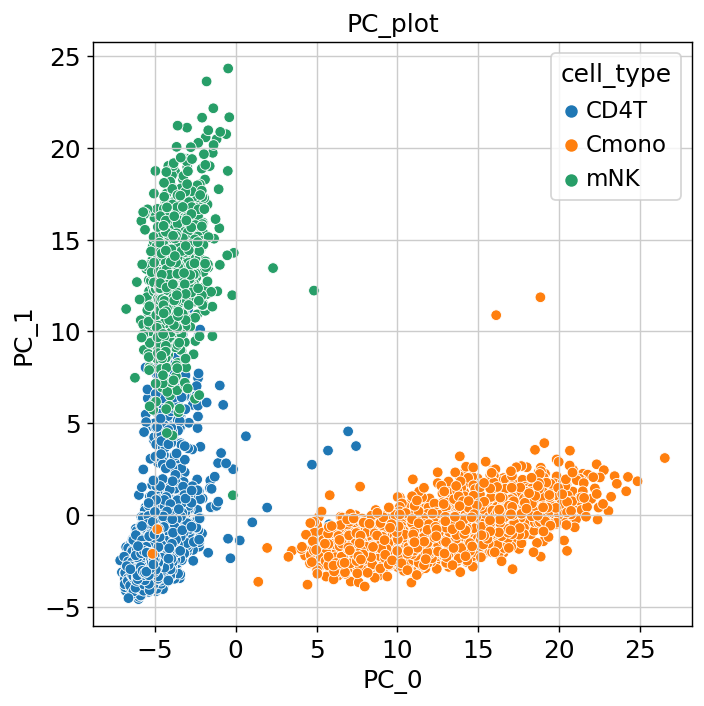

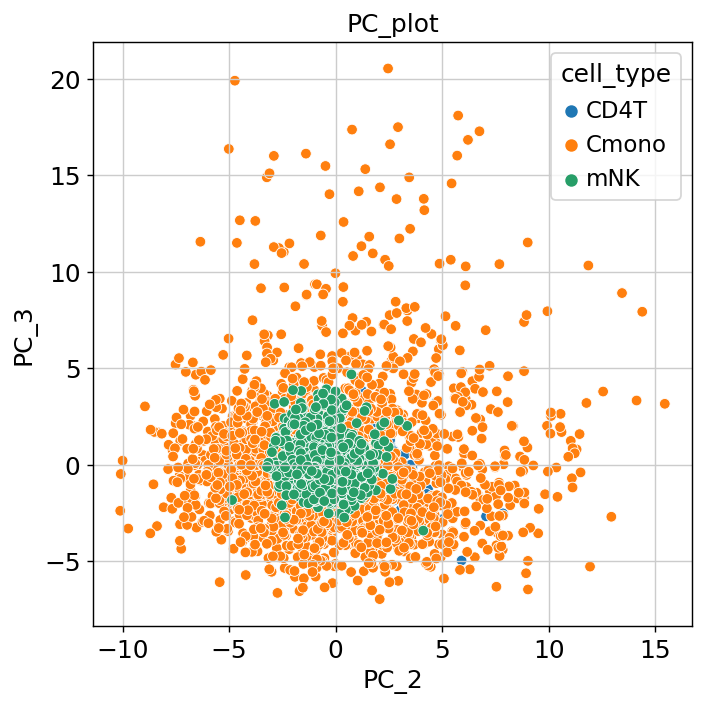

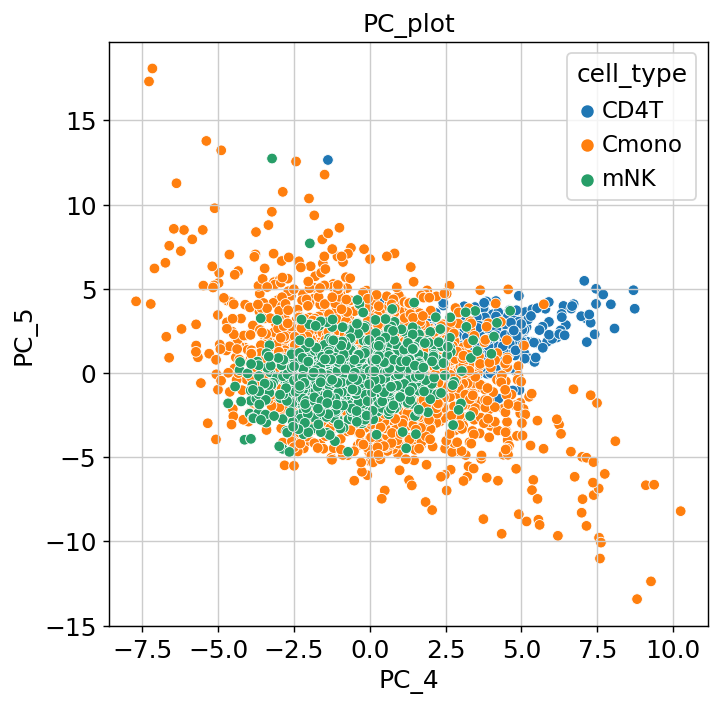

In [7]:
adata = load_kong_data(['CD4T', 'Cmono', 'mNK'])
run(adata)